# Survival Analysis


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter,CoxPHFitter

sns.set()
df = pd.read_csv('haberman.csv',header=None,names=['age','op_Year','axil_nodes','surv_status'])
print(df.head())

   age  op_Year  axil_nodes  surv_status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1


In [70]:
print(df['surv_status'].unique())
#by dataset info, 1 is surviving 5 years, 2 is dying within


[1 2]


In [71]:
#df['surv_status']=df['surv_status'].map({1:'yes',2:"no"})

In [72]:
df.head()

,age,op_Year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [73]:
print(df.iloc[:,-1].value_counts(normalize=True))
#26% dies within 5 years

1    0.735294
2    0.264706
Name: surv_status, dtype: float64


C:\Users\jepp5\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\jepp5\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


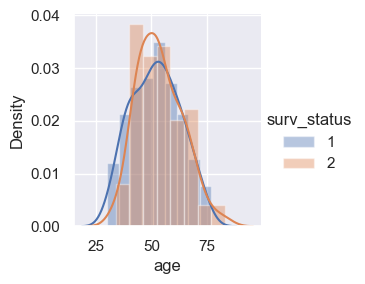

C:\Users\jepp5\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\jepp5\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


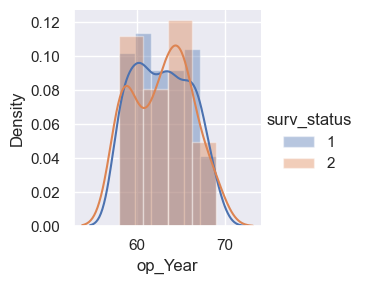

C:\Users\jepp5\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\jepp5\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


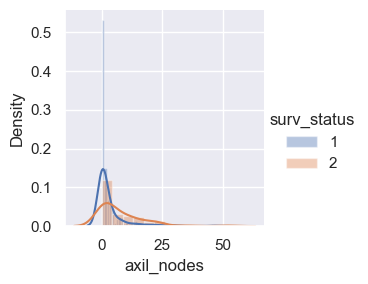

In [74]:
for idx, feat in enumerate(list(df.columns)[:-1]):
    figure = sns.FacetGrid(df,hue="surv_status")
    figure.map(sns.distplot,feat).add_legend()
    plt.show()

In [75]:
km = KaplanMeierFitter()
km.fit(durations=df['age'],event_observed=df['surv_status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 306 total observations, 0 right-censored observations>

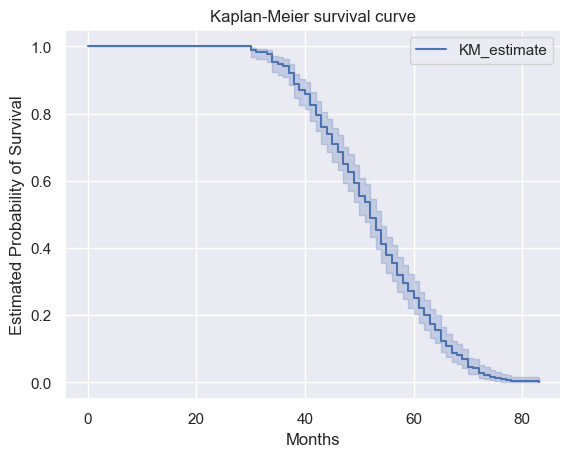

In [76]:
fig, ax =  plt.subplots()
km.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Months',
    ylabel='Estimated Probability of Survival'
);

<Axes: xlabel='timeline'>

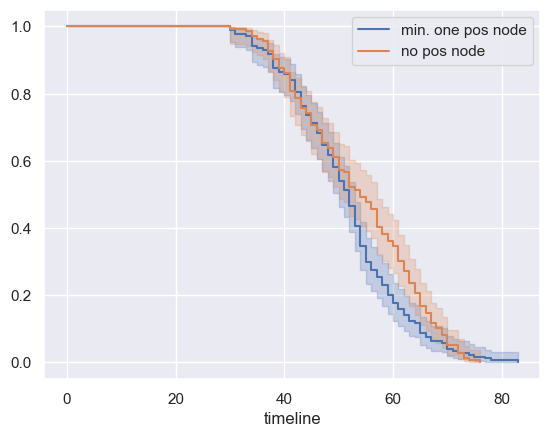

In [78]:
km2 =KaplanMeierFitter()
groups = df['axil_nodes']
g1 = (groups>=1)
g2 = (groups<1)

km2.fit(df['age'][g1],df['surv_status'][g1],label="min. one pos node")
a1 = km2.plot()
km2.fit(df['age'][g2],df['surv_status'][g2],label="no pos node")
km2.plot(ax=a1)

In [84]:
cph = CoxPHFitter()
cph.fit(df,'age',event_col='surv_status')

<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>

In [85]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'age'
                event col = 'surv_status'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2023-05-11 09:13:47 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
op_Year     -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
axil_nodes   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

             cmp to     z    p   -log2(p)
covariate                                
op_Year        0.00 -1.39 0.16       2.61
axil_nodes     0.00  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25

<Axes: xlabel='log(HR) (95% CI)'>

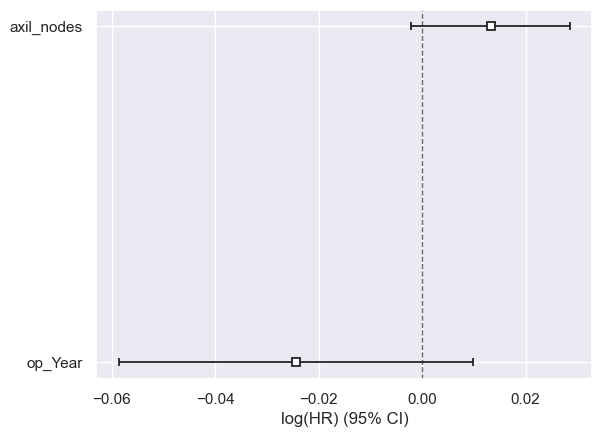

In [86]:
cph.plot()

In [91]:
#Randomly selecting some patients to see their survival chances
pat = [4,212,280]
rows = df.iloc[pat,1:3]
rows

,op_Year,axil_nodes
4,65,4
212,58,0
280,68,0


<Axes: >

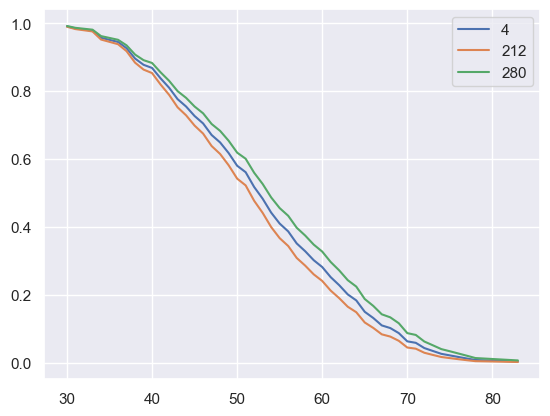

In [92]:
cph.predict_survival_function(rows).plot()

In [93]:
#Pretty surprising that 212 has worst outcome, with 0 axil nodes and a early op year